In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = './data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(64, 64),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 9s - loss: 0.5523 - acc: 0.7155 - val_loss: 0.5636 - val_acc: 0.6910
Epoch 2/100
100/100 - 9s - loss: 0.5630 - acc: 0.7130 - val_loss: 0.5659 - val_acc: 0.6920
Epoch 3/100
100/100 - 9s - loss: 0.5436 - acc: 0.7290 - val_loss: 0.5680 - val_acc: 0.6980
Epoch 4/100
100/100 - 9s - loss: 0.5584 - acc: 0.7170 - val_loss: 0.5171 - val_acc: 0.7370
Epoch 5/100
100/100 - 9s - loss: 0.5545 - acc: 0.7180 - val_loss: 0.5692 - val_acc: 0.6970
Epoch 6/100
100/100 - 9s - loss: 0.5437 - acc: 0.7290 - val_loss: 0.5291 - val_acc: 0.7150
Epoch 7/100
100/100 - 9s - loss: 0.5435 - acc: 0.7235 - val_loss: 0.5166 - val_acc: 0.7320
Epoch 8/100
100/100 - 9s - loss: 0.5432 - acc: 0.7250 - val_loss: 0.5123 - val_acc: 0.7360
Epoch 9/100
100/100 - 9s - loss: 0.5315 - acc: 0.7505 - val_loss: 0.5392 - val_acc: 0.7130
Epoch 10/100
100/100 - 9s - loss: 0.5386 - acc: 0.7295 - val_loss: 0.5009 - val_acc: 0.7470
Epoch

Epoch 90/100
100/100 - 9s - loss: 0.3932 - acc: 0.8210 - val_loss: 0.4348 - val_acc: 0.7980
Epoch 91/100
100/100 - 9s - loss: 0.4036 - acc: 0.8050 - val_loss: 0.4441 - val_acc: 0.7800
Epoch 92/100
100/100 - 9s - loss: 0.3924 - acc: 0.8150 - val_loss: 0.4150 - val_acc: 0.7970
Epoch 93/100
100/100 - 9s - loss: 0.4002 - acc: 0.8200 - val_loss: 0.4173 - val_acc: 0.7900
Epoch 94/100
100/100 - 9s - loss: 0.3817 - acc: 0.8270 - val_loss: 0.4540 - val_acc: 0.7900
Epoch 95/100
100/100 - 9s - loss: 0.3823 - acc: 0.8275 - val_loss: 0.4453 - val_acc: 0.7820
Epoch 96/100
100/100 - 9s - loss: 0.3972 - acc: 0.8230 - val_loss: 0.4215 - val_acc: 0.8010
Epoch 97/100
100/100 - 9s - loss: 0.3859 - acc: 0.8165 - val_loss: 0.4694 - val_acc: 0.7760
Epoch 98/100
100/100 - 9s - loss: 0.3869 - acc: 0.8235 - val_loss: 0.4320 - val_acc: 0.7900
Epoch 99/100
100/100 - 9s - loss: 0.3670 - acc: 0.8370 - val_loss: 0.4327 - val_acc: 0.7880
Epoch 100/100
100/100 - 9s - loss: 0.3922 - acc: 0.8185 - val_loss: 0.4562 - val

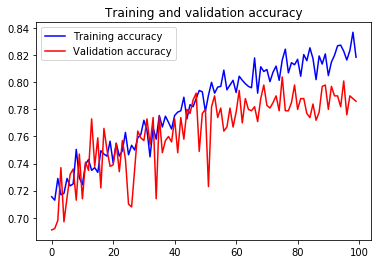

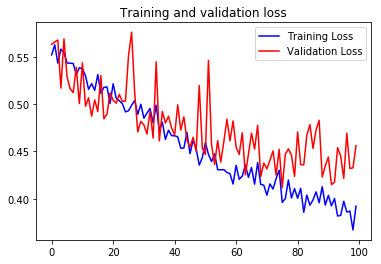

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()